In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
#importing the data

directory = os.fsencode('spicule_histograms')

histnames = []
histdict = {}

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if (filename.endswith(".csv") and not "metadata" in filename):
        histnames.append(filename[:-4])
        path = "spicule_histograms/" + str(filename)
        #plot the histogram
        Hist = pd.read_csv(path, sep=',')
        Hist = Hist.rename(columns={'Lower limit (um)':'Lower', 'Mid point (um)':'Mid','Upper limit (um)':'Upper', 'Good=1 Bad=0 flag':'Flag','Concentration (#/m**3)':'Concentration'})
        histdict[filename[:-4]] = Hist

    

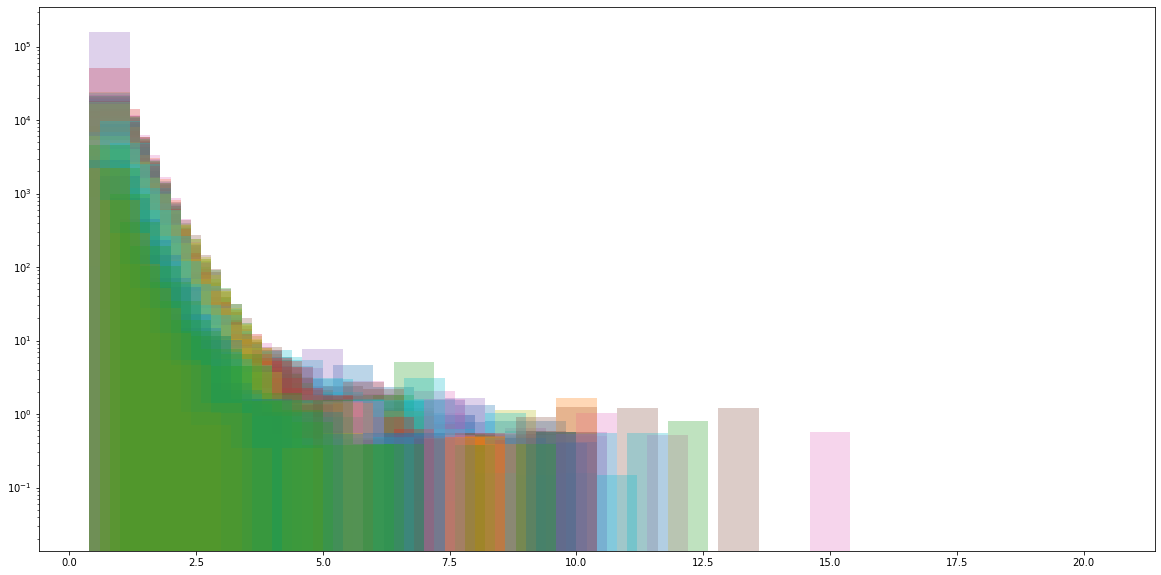

In [7]:
# plotting
# plot all histograms on one plot, with a log-log axis

fig = plt.figure(figsize=(20, 10))
plt.yscale('log')
#plt.xscale('log')

for df in histdict.values():
    plt.bar(df['Mid'], df['Concentration'], alpha=0.3)
    
plt.show()


fig3 = plt.figure(figsize=(20, 10))
plt.yscale('log')
#plt.xscale('log')

for df in histdict.values():
    plt.plot(df['Mid'], df['Concentration'], 'o')
    
plt.show()

In [22]:
# average all bins and plot bar graph
# concatenate them
df_concat = pd.concat(histdict.values())

by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()

print(df_means.head())

fig2 = plt.figure(figsize=(20, 10))
plt.yscale('log')

plt.bar(df_means['Mid'], df_means['Concentration'])
    
plt.show()



   Bin  Lower  Mid  Upper  Flag  Concentration
0  4.0    0.7  0.8    0.9   1.0    7540.763992
1  5.0    0.9  1.0    1.1   1.0    2900.201780
2  6.0    1.1  1.2    1.3   1.0    1425.853878
3  7.0    1.3  1.4    1.5   1.0     709.288007
4  8.0    1.5  1.6    1.7   1.0     360.747295


In [10]:
# Import metadata
# clean the data


Meta = pd.read_csv('metadata_mass.csv', sep=',')
Meta.head()

slide label Flight number  Slide exposure date (yymmdd)  \
0   sli_histo_210525a1          TF01                      210525.0   
1  sli_histo_210525a10          TF01                      210525.0   
2  sli_histo_210525a12          TF01                      210525.0   
3   sli_histo_210525a2          TF01                      210525.0   
4   sli_histo_210525a3          TF01                      210525.0   

   Slide number within the flight  Slide begin exposure (hhmmss.s)  \
0                             1.0                         193054.4   
1                            10.0                         205500.9   
2                            12.0                         212011.1   
3                             2.0                         193449.0   
4                             3.0                         193852.1   

   Slide end exposure (hhmmss.s)  Slide exposure duration (s)  \
0                       193153.1                         58.7   
1                       210459.6                        598.7   
2                       212109.8                         58.7   
3                       193747.7                        178.7   
4                       194850.8                        598.7   

   Slide exposure sample volume (m**3)  \
0                             0.840057   
1                             2.776975   
2                             0.039284   
3                             2.534470   
4                             1.003148   

   Slide exposure average GPS altitude (m)  \
0                                   3588.0   
1                                   5549.0   
2                                   5440.0   
3                                   3586.0   
4                                   4362.0   

   Slide exposure minimum GPS altitude (m)  ...  \
0                                   3582.0  ...   
1                                   5117.0  ...   
2                                   5436.0  ...   
3                                   3579.0  ...   
4                                   3655.0  ...   

   Slide exposure average pressure (hpa)  \
0                                 659.14   
1                                 512.63   
2                                 520.67   
3                                 659.40   
4                                 598.68   

   Slide exposure average temperature (C)  \
0                                   -1.19   
1                                  -15.00   
2                                  -14.17   
3                                   -1.44   
4                                   -6.29   

   Slide exposure average dewpoint temp. (C)  \
0                                     -13.53   
1                                     -31.60   
2                                     -28.55   
3                                     -11.08   
4                                     -21.10   

   Slide exposure average rel. hum. (%)  \
0                                 39.34   
1                                 26.04   
2                                 31.33   
3                                 49.17   
4                                 29.94   

   Slide exposure average wind speed (m/s)  \
0                                    14.57   
1                                    15.38   
2                                    10.54   
3                                    10.67   
4                                    13.15   

   Slide exposure average wind direction (deg)  \
0                                       276.27   
1                                       276.65   
2                                       255.94   
3                                       278.78   
4                                       270.50   

   Slide exposure average longitude (deg.decimal)  \
0                                         -103.09   
1                                         -104.77   
2                                         -105.72   
3                                         -102.67   
4             

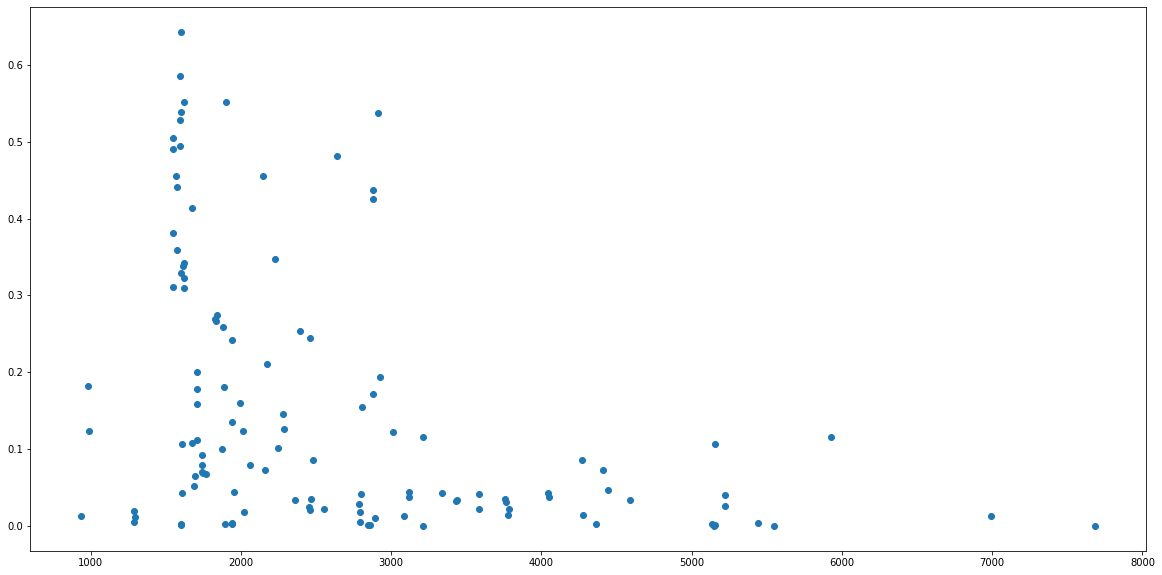

In [11]:
# plot mass with other values

Meta = Meta.rename(columns={'NaCl equivalent mass loading (microg/m**3)':'Mass', 
                            'Slide exposure average GPS altitude (m)':'Avg GPS alt',
                            'Slide exposure average pressure (hpa)':'Pressure', 
                            'Slide exposure average dewpoint temp. (C)':'Dewpoint',
                            'Slide exposure average longitude (deg.decimal)':'Lon',
                            'Slide exposure average latitude (deg.decimal)':'Lat'})

# mass vs altitude

fig3 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Avg GPS alt'], Meta['Mass'], 'o')
    
plt.show()




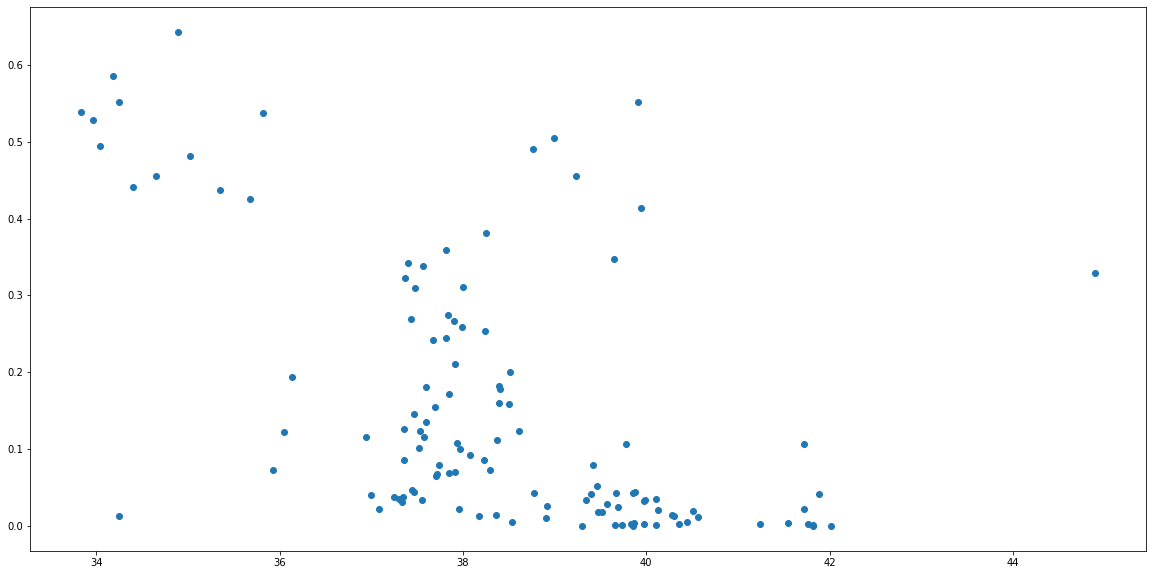

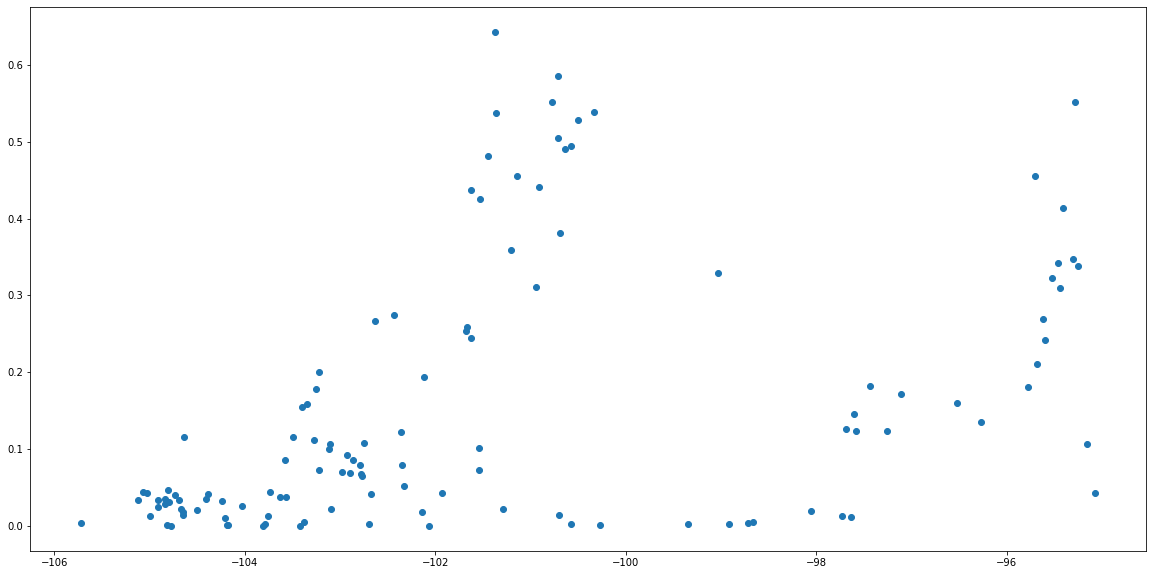

In [15]:
# lat lon, mass heat map

fig4 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Lat'], Meta['Mass'], 'o')
    
plt.show()

fig5 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Lon'], Meta['Mass'], 'o')
    
plt.show()

In [16]:
# dewpoint temp

fig6 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Dewpoint'], Meta['Mass'], 'o')
    
plt.show()

In [17]:
fig7 = plt.figure(figsize=(20, 10))

plt.plot(Meta['Avg GPS alt'], Meta['Dewpoint'], 'o')
    
plt.show()